In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

72.62734797137537 -120.24924296385552
-87.90279210962265 128.11084851841406
-29.111702122250406 17.54081071099398
-29.869046332297316 92.1691373808357
-68.67731306690857 -179.62960165361966
-20.568009133087543 -170.81708169595623
-12.479758836483143 55.55091405749337
-62.93124026442953 69.94379731475124
0.2720699014550405 154.5442236210286
-42.19000036802527 166.49739317599204
-22.734329474732846 154.5149498911601
44.958445773414155 173.99926817851627
16.121849023131816 165.29376240682063
-37.79932679129605 -134.05206117852927
-8.69545293285637 1.641043749107979
66.30378452630782 124.68681831257146
-34.36257721552575 -126.47929089974187
77.03698837750031 26.835069200134456
46.06735778310605 -149.0992256672107
25.378096646263742 147.0105311336103
55.955799346675946 -152.0997388487307
0.21234632603722048 35.86806438577119
-10.961096832417624 29.550986740256377
-13.419654398130362 -97.15345360352136
-28.164635859082246 78.90117077187193
74.5008522835987 111.15679181888629
-46.944848882234

53.20302670778693 140.19895457866454
-16.82873396240427 -109.37409888053666
44.629788218175236 -119.37727729594081
45.87052970188884 118.88778771622873
64.67881018259692 161.79827032985764
-64.06655030775718 -37.311318749510065
-11.792196122545818 -42.59029203603319
58.766409154583755 62.570337057087556
41.185891514465226 85.76735024080983
-89.33961689724924 19.4696654243441
75.42034629054052 -61.99852185694442
47.6803899007503 -69.84990626480952
-87.93196762599594 -56.73645326564612
11.583279745579162 77.71961082858098
75.82872688676511 -78.6523747922854
25.73002297860863 154.02696244493052
89.82819721611 92.30793783854784
-48.76524093678766 37.71338855124492
65.8211555258984 149.53689164812533
73.1595742489746 -63.802291065570714
34.41763670162318 8.207461038119362
-24.11939632024921 43.9959023429349
88.11783957713996 135.29227649636783
54.47426864915025 157.31512296730716
44.52350819703747 36.648151376006695
-27.81896679338074 -50.840290171158784
-57.78929245116028 -123.011066233094

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0e4005f9312d3eb51dc637a97892d62c


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0e4005f9312d3eb51dc637a97892d62c&q=Boston


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [20]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 25 of Set 37 | norman wells
Processing Record 26 of Set 37 | new norfolk
Processing Record 27 of Set 37 | springbok
Processing Record 28 of Set 37 | carnarvon
Processing Record 29 of Set 37 | vaini
Processing Record 30 of Set 37 | alofi
Processing Record 31 of Set 37 | sambava
Processing Record 32 of Set 37 | saint-philippe
Processing Record 33 of Set 37 | namatanai
Processing Record 34 of Set 37 | te anau
Processing Record 35 of Set 37 | hervey bay
Processing Record 36 of Set 37 | nikolskoye
Processing Record 37 of Set 37 | butaritari
Processing Record 38 of Set 37 | rikitea
Processing Record 39 of Set 37 | gamba
Processing Record 40 of Set 37 | zhigansk
Processing Record 41 of Set 37 | mehamn
Processing Record 42 of Set 37 | kodiak
Processing Record 43 of Set 37 | katsuura
Processing Record 44 of Set 37 | eldama ravine
Processing Record 45 of Set 37 | samfya
Processing Record 46 of Set 37 | puerto ayora
Processing Record 47 of Set 37 | bambous virieux
Processing Rec

Processing Record 38 of Set 40 | sorland
Processing Record 39 of Set 40 | nha trang
Processing Record 40 of Set 40 | puerto madryn
Processing Record 41 of Set 40 | hobyo
Processing Record 42 of Set 40 | ancud
Processing Record 43 of Set 40 | husavik
Processing Record 44 of Set 40 | pisco
Processing Record 45 of Set 40 | thessalon
Processing Record 46 of Set 40 | hamilton
Processing Record 47 of Set 40 | san joaquin
Processing Record 48 of Set 40 | taolanaro
City not found. Skipping...
Processing Record 49 of Set 40 | saint anthony
Processing Record 50 of Set 40 | bredasdorp
Processing Record 1 of Set 41 | manggar
Processing Record 2 of Set 41 | tasiilaq
Processing Record 3 of Set 41 | port lincoln
Processing Record 4 of Set 41 | seda
Processing Record 5 of Set 41 | daru
Processing Record 6 of Set 41 | dickinson
Processing Record 7 of Set 41 | labutta
City not found. Skipping...
Processing Record 8 of Set 41 | geraldton
Processing Record 9 of Set 41 | talnakh
Processing Record 10 of Set

Processing Record 27 of Set 44 | san jose
Processing Record 28 of Set 44 | kazanka
Processing Record 29 of Set 44 | lompoc
Processing Record 30 of Set 44 | dien bien
City not found. Skipping...
Processing Record 31 of Set 44 | balkanabat
Processing Record 32 of Set 44 | millville
Processing Record 33 of Set 44 | cartagena
Processing Record 34 of Set 44 | peniche
Processing Record 35 of Set 44 | dalvik
Processing Record 36 of Set 44 | along
Processing Record 37 of Set 44 | nemuro
Processing Record 38 of Set 44 | wahran
City not found. Skipping...
Processing Record 39 of Set 44 | tanda
Processing Record 40 of Set 44 | benghazi
Processing Record 41 of Set 44 | northam
Processing Record 42 of Set 44 | mamit
Processing Record 43 of Set 44 | saint-louis
Processing Record 44 of Set 44 | alice springs
Processing Record 45 of Set 44 | deputatskiy
Processing Record 46 of Set 44 | proletariy
Processing Record 47 of Set 44 | manoel urbano
Processing Record 48 of Set 44 | salinopolis
Processing Rec

Processing Record 17 of Set 48 | robe
Processing Record 18 of Set 48 | half moon bay
Processing Record 19 of Set 48 | cancun
Processing Record 20 of Set 48 | dolores
Processing Record 21 of Set 48 | churapcha
Processing Record 22 of Set 48 | winkler
Processing Record 23 of Set 48 | poronaysk
Processing Record 24 of Set 48 | padampur
Processing Record 25 of Set 48 | jaque
Processing Record 26 of Set 48 | doctor pedro p. pena
City not found. Skipping...
Processing Record 27 of Set 48 | hambantota
Processing Record 28 of Set 48 | tahoua
Processing Record 29 of Set 48 | veraval
Processing Record 30 of Set 48 | bolshaya chernigovka
City not found. Skipping...
Processing Record 31 of Set 48 | honiara
Processing Record 32 of Set 48 | vuktyl
Processing Record 33 of Set 48 | kirkland lake
Processing Record 34 of Set 48 | jalpan
Processing Record 35 of Set 48 | springdale
Processing Record 36 of Set 48 | miri
Processing Record 37 of Set 48 | coihaique
Processing Record 38 of Set 48 | west bay
Pr

In [21]:
len(city_data)

578

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bang Saphan,11.21,99.51,77.34,86,99,4.76,TH,2020-06-27 20:36:24
1,Norman Wells,65.28,-126.83,60.80,51,75,16.11,CA,2020-06-27 20:48:41
2,New Norfolk,-42.78,147.06,37.99,93,27,2.68,AU,2020-06-27 20:48:41
3,Springbok,-29.66,17.89,46.06,89,45,6.11,ZA,2020-06-27 20:48:41
4,Carnarvon,-24.87,113.63,64.40,100,90,9.17,AU,2020-06-27 20:48:41
5,Vaini,-21.20,-175.20,77.00,88,20,5.82,TO,2020-06-27 20:46:31
6,Alofi,-19.06,-169.92,77.00,78,75,6.93,NU,2020-06-27 20:48:42
7,Sambava,-14.27,50.17,70.97,86,6,11.50,MG,2020-06-27 20:48:42
8,Saint-Philippe,-21.36,55.77,71.60,73,75,5.82,RE,2020-06-27 20:46:47
9,Namatanai,-3.67,152.43,79.88,81,79,4.81,PG,2020-06-27 20:48:42


In [28]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bang Saphan,TH,2020-06-27 20:36:24,11.21,99.51,77.34,86,99,4.76
1,Norman Wells,CA,2020-06-27 20:48:41,65.28,-126.83,60.80,51,75,16.11
2,New Norfolk,AU,2020-06-27 20:48:41,-42.78,147.06,37.99,93,27,2.68
3,Springbok,ZA,2020-06-27 20:48:41,-29.66,17.89,46.06,89,45,6.11
4,Carnarvon,AU,2020-06-27 20:48:41,-24.87,113.63,64.40,100,90,9.17
5,Vaini,TO,2020-06-27 20:46:31,-21.20,-175.20,77.00,88,20,5.82
6,Alofi,NU,2020-06-27 20:48:42,-19.06,-169.92,77.00,78,75,6.93
7,Sambava,MG,2020-06-27 20:48:42,-14.27,50.17,70.97,86,6,11.50
8,Saint-Philippe,RE,2020-06-27 20:46:47,-21.36,55.77,71.60,73,75,5.82
9,Namatanai,PG,2020-06-27 20:48:42,-3.67,152.43,79.88,81,79,4.81


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [33]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'06/27/20'

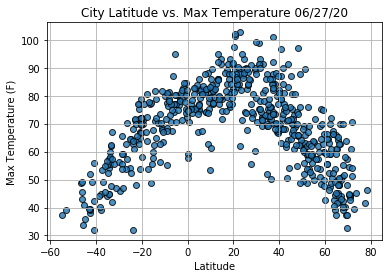

In [36]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

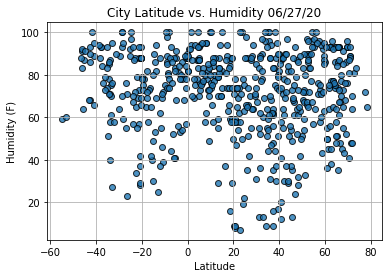

In [37]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

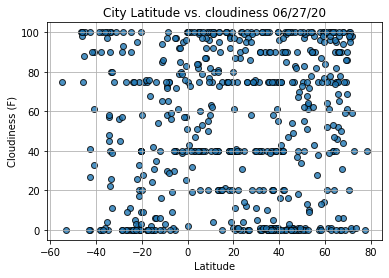

In [38]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

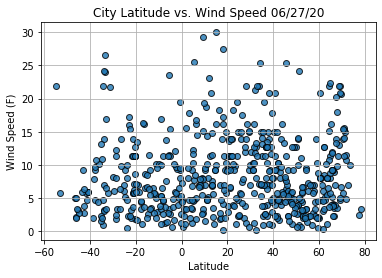

In [39]:
# Build the scatter plot for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()